# **TASK 3**

# **“ ANALYSIS OF PIZZA PLACE SALES DATA”**

## Data Preparation step for the analysis
### 1. Import the required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



### 2. Load the dataset needed for the analysis

In [2]:
orders = pd.read_csv(r"C:\Users\USER\OneDrive\orders.csv")

orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [3]:
order_details = pd.read_csv(r"C:\Users\USER\OneDrive\order_details.csv")

order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
pizzas = pd.read_csv(r"C:\Users\USER\OneDrive\pizzas.csv")

pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [5]:
pizza_types = pd.read_csv(r"C:\Users\USER\OneDrive\pizza_types.csv" , encoding="latin1")

pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


### 3. Merging the dataset

In [6]:
# Merging order with order_details

df1 = pd.merge(orders, order_details, on ="order_id", how = "inner")

df1.head()

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [7]:
# Merge with pizza

df2 = pd.merge(df1, pizzas , on ="pizza_id", how = "inner" )

df2.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00


In [8]:
# merge with pizza type
pizza_sales_df = pd.merge(df2, pizza_types, on="pizza_type_id", how="inner")

pizza_sales_df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [9]:
pizza_sales_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


### Data cleaning & validation

In [10]:
pizza_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [11]:
pizza_sales_df.isna().sum()


order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

#### The pizza_sales_df is clean and contain no missing values The only exception is the `date` and `time` columns, which are currently stored as object type.

So the `date` and `time` columns will only need to be converted to datetime format for analyses  


In [12]:
# Convert Date
pizza_sales_df['date'] = pd.to_datetime(pizza_sales_df['date'])



In [13]:
pizza_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB





### Recommended Analysis 


#### 1.  What is the total revenue/sales?
To find the total revenue/sales we calculate as price * quantity

In [14]:
# Add revenue column 

pizza_sales_df['revenue'] = pizza_sales_df["price"] * pizza_sales_df["quantity"]

pizza_sales_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [15]:
# The total revenue/ sales

total_revenue = pizza_sales_df['revenue'].sum()

print("Total Revenue:", total_revenue)


Total Revenue: 817860.0499999999


### 2. Find the total quantity sold.

In [16]:
total_quantity_sold = pizza_sales_df["quantity"].sum()

print("Total Quantity Sold:" , total_quantity_sold)

Total Quantity Sold: 49574


### 3. Total Order

In [17]:
total_orders = pizza_sales_df['order_id'].nunique()

print("Total Orders:", total_orders)


Total Orders: 21350


### 4. How many pizza types do they sell?

In [18]:
pizza_sales_df["name"].value_counts()

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

In [19]:
number_pizza_types = pizza_sales_df['name'].nunique()
print("Number of Pizza Types Sold:", number_pizza_types)


Number of Pizza Types Sold: 32


### 5. Average Price of Pizza

In [20]:
# we calculate the average price of pizza sold using the .mean() function on the price

average_price = pizza_sales_df['price'].mean()

print("Average Pizza Price:", average_price)


Average Pizza Price: 16.494132044426163


### 6. Peak Hours of sales

- To find the peak hours of sales, we convert the `time` column from object type to datetime format.  
Then, we extract the hour from it to analyze sales distribution by hour.


In [21]:
pizza_sales_df['time'] = pd.to_datetime(pizza_sales_df['time'], format='%H:%M:%S').dt.hour

In [22]:
peak_hours = pizza_sales_df.groupby('time')['order_id'].nunique().sort_values(ascending=False)

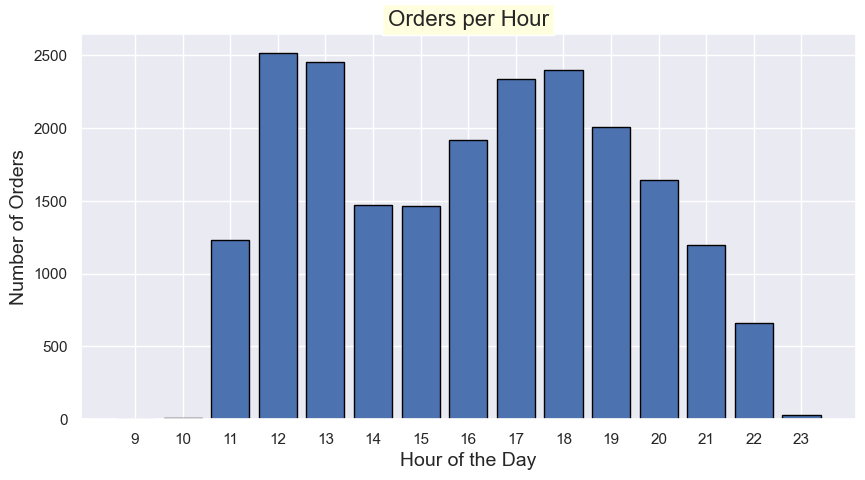

In [23]:
plt.figure(figsize =(10,5))

plt.bar(peak_hours.index, peak_hours.values , edgecolor='black')
plt.xticks(peak_hours.index)
plt.title("Orders per Hour",fontsize ='16',bbox=dict(facecolor='lightyellow'))
plt.xlabel("Hour of the Day",fontsize ='14' )
plt.ylabel("Number of Orders", fontsize ='14')

plt.show()


### 7.  Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [24]:
#  We create a new column `day_of_week` by extracting the day name from the `date` column.  
#This allows us to analyze sales by each day of the week (Monday, Tuesday, etc.).

pizza_sales_df['day_of_week'] = pizza_sales_df['date'].dt.day_name()


In [25]:
# The total sales made on each day of the week 
sales_by_day = pizza_sales_df.groupby('day_of_week')['revenue'].sum().sort_values(ascending = True)


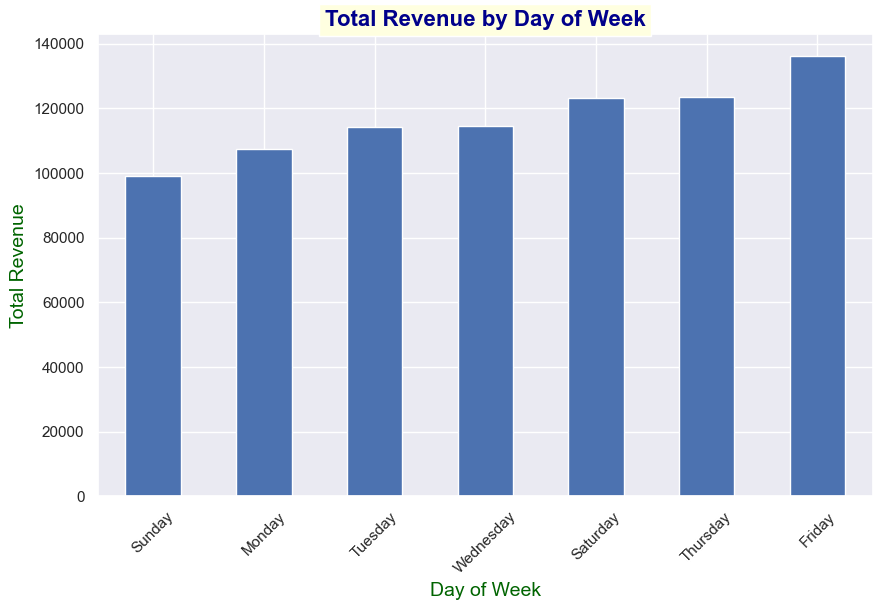

In [26]:
# To find which day of the week is when sales are made the most


plt.figure(figsize=(10,6))

sales_by_day.plot(kind ="bar")
plt.title('Total Revenue by Day of Week', fontsize=16, weight='bold', color='darkblue', bbox=dict(facecolor='lightyellow'))
plt.xlabel('Day of Week', color='darkgreen', fontsize=14 )
plt.ylabel('Total Revenue' ,color='darkgreen', fontsize=14)

plt.xticks(rotation=45)
plt.show()

### Result

From the bar chart above, Friday recorded the highest total sales, making it the most profitable day of the week. 
This suggests increased customer demand toward the weekend.
This suggests that customer demand is highest on Fridays, possibly due to weekend preparation or increased social activities.


## 8 . Top 5 Bestselling Pizzas

In [27]:
#The Top 5 Best selling 
top_5_pizzas = pizza_sales_df.groupby('name')['quantity'].sum().sort_values(ascending=False).head()

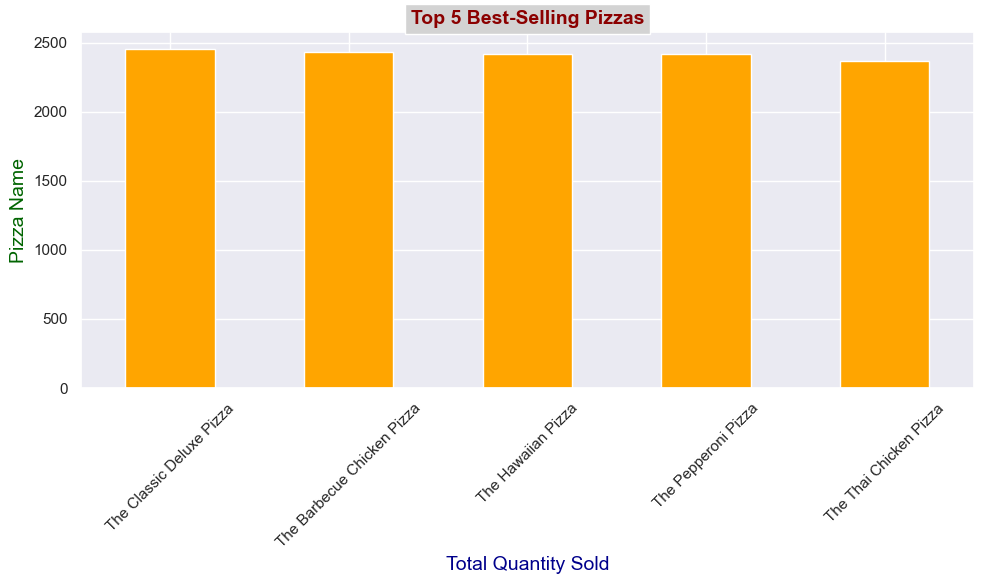

In [28]:

plt.figure(figsize=(10,6))

top_5_pizzas.plot(kind='bar', color='orange')  # horizontal bars

plt.title('Top 5 Best-Selling Pizzas', fontsize=14, weight='bold', color='darkred', bbox=dict(facecolor='lightgrey'))
plt.xlabel('Total Quantity Sold', color='darkblue', fontsize = 14)
plt.ylabel('Pizza Name', color='darkgreen', fontsize = 14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 9. Find the sales made in each month. Any trend noticeable?


In [29]:
# Extract month num from the month dtype
pizza_sales_df['month_num'] = pizza_sales_df['date'].dt.month

# Now we sort month by chronological order by month number
pizza_sales_df['month_name'] = pizza_sales_df['date'].dt.strftime('%B')

monthly_sales = pizza_sales_df.groupby(['month_num', 'month_name'])['revenue'].sum() .sort_index()


In [30]:
monthly_sales = pizza_sales_df.groupby(['month_num', 'month_name'])['revenue'].sum().reset_index()

monthly_sales

,month_num,month_name,revenue
0,1,January,69793.30
1,2,February,65159.60
2,3,March,70397.10
3,4,April,68736.80
4,5,May,71402.75
5,6,June,68230.20
6,7,July,72557.90
7,8,August,68278.25
8,9,September,64180.05
9,10,October,64027.60


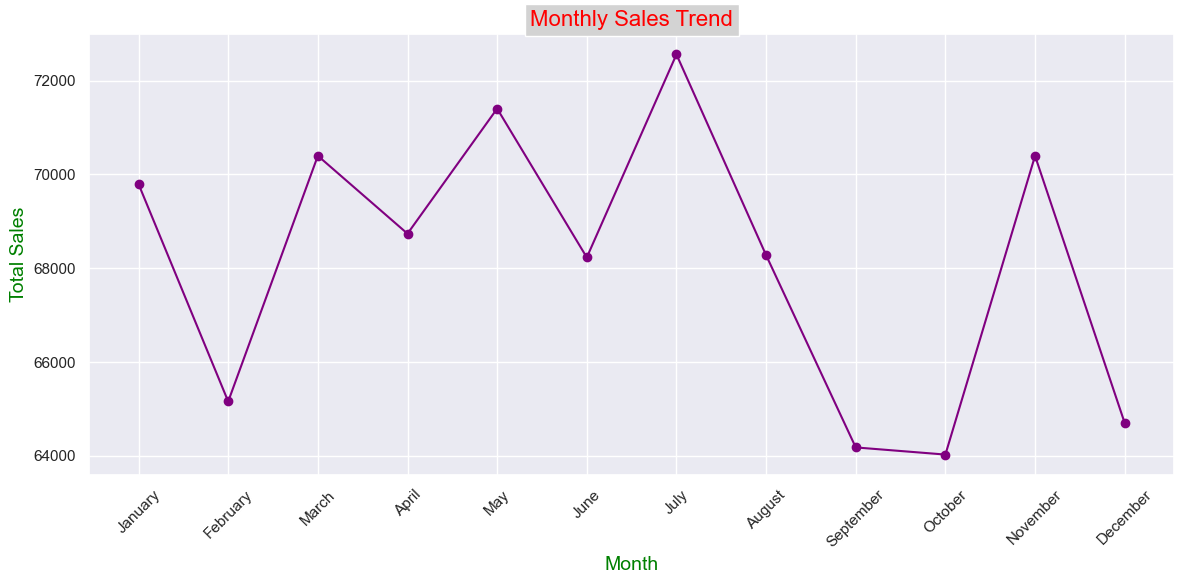

In [31]:
plt.figure(figsize=(12,6))

plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='o', color ="purple")

plt.title("Monthly Sales Trend", fontsize=16, color = 'red', bbox=dict(facecolor='lightgray'))
plt.xlabel("Month", fontsize=14 , color = 'green')
plt.ylabel("Total Sales", fontsize=14, color = 'green')

plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)
plt.show()

### From the visualization(line chart) above which shows total sales for each month of the year.it is noticeable that:
 -  The monthly sales show some changes throughout the year. Sales increase from January and reach the highest point in July. After July, sales start to decrease, especially in September and October,a noticeable decline occurs in September and October, followed by a slight recovery in November. Overall, sales are higher in the middle of the year and lower towards the end and indicating a mid-year peak in demand.


## 10. Are there pizza types that are not doing well on the menu?

  - Underperforming Pizza Types




In [32]:
# Total sales per pizza type

pizza_performance = pizza_sales_df.groupby('name')['quantity'].sum().sort_values()


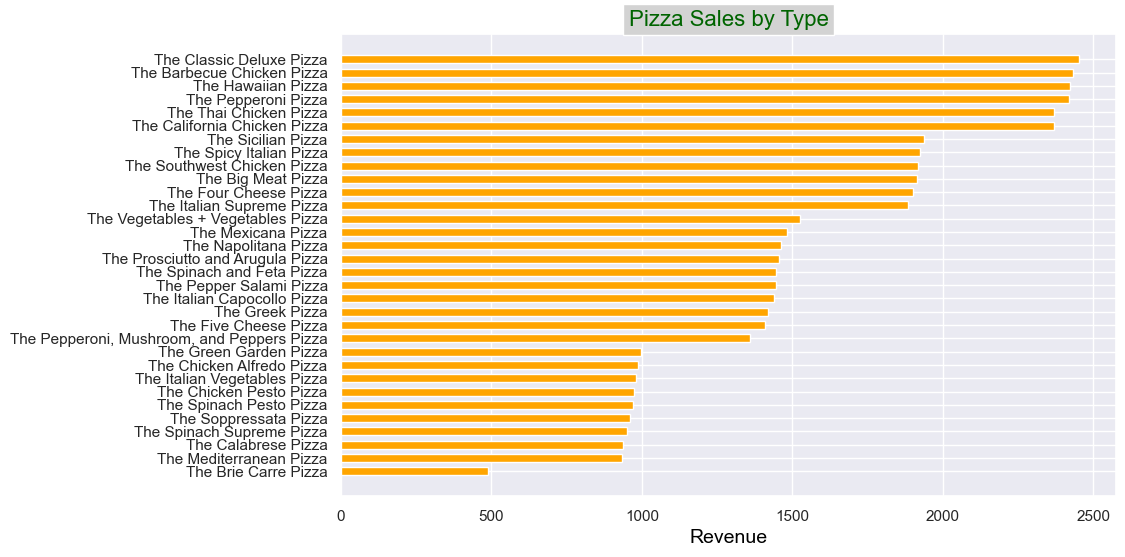

In [33]:
plt.figure(figsize=(10,6))

plt.barh(pizza_performance.index,  pizza_performance.values, color='orange', height=0.6)
plt.xlabel("Revenue",  fontsize=14, color = 'black')
plt.title("Pizza Sales by Type",  fontsize=16, color = "darkgreen", bbox=dict(facecolor='lightgray'))
plt.show()


 ### The horizontal bar chart shows the sales performance of each pizza type.
 - Pizzas with the shortest bars, have the lowest sales, indicating that they are underperforming on the menu i.e are not selling well. On the other hand, pizzas with the longest bars are the most popular and generate the highest revenue. 
 - This chart clearly highlights which pizza types may need promotion, or reconsideration on the menu.

# Exploratory data analysis

### 1. Cumulative Sales over time
- shows how sales are growing over the year.

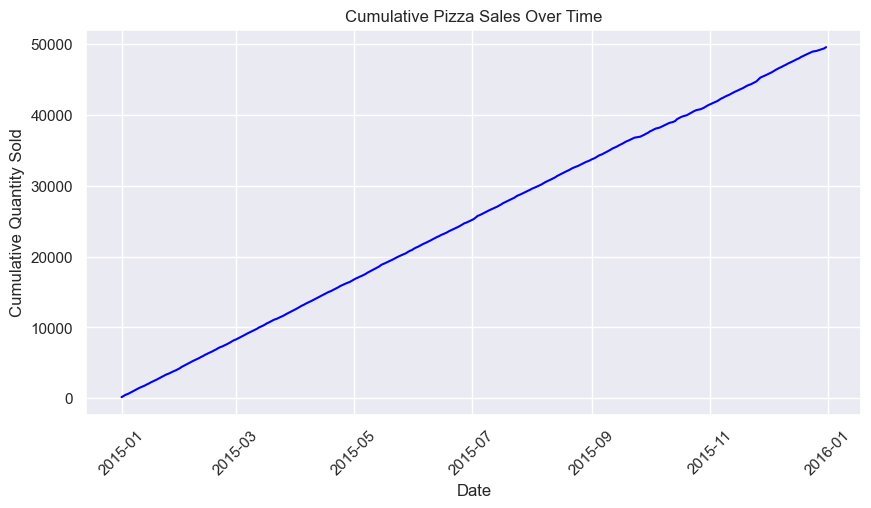

In [34]:
daily_sales = pizza_sales_df.groupby('date')['quantity'].sum().cumsum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, color='blue')
plt.title("Cumulative Pizza Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Quantity Sold")
plt.xticks(rotation=45)
plt.show()


The line chart shows cumulative sales over time. Sales steadily increase throughout the year, with noticeable spikes at certain dates. This helps identify peak periods for orders.


### 2.  Revenue vs Quantity Sold by Pizza Type
- The relationship between the number of pizzas sold and the revenue they generate.  
Pizzas that sell less but earn more may be premium items, while pizzas with high quantity and lower revenue are popular but cheaper.


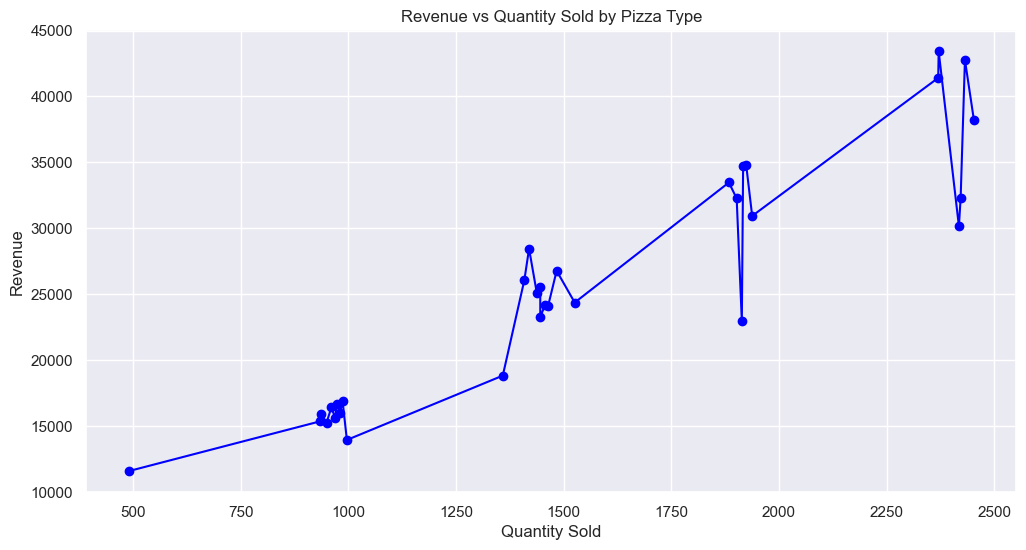

In [35]:

pizza_summary = pizza_sales_df.groupby('name')[['quantity','revenue']].sum()

# Sort by quantity
pizza_summary = pizza_summary.sort_values('quantity')

# Plot
plt.figure(figsize=(12,6))
plt.plot(pizza_summary['quantity'], pizza_summary['revenue'], marker='o', color='blue')
plt.xlabel("Quantity Sold")
plt.ylabel("Revenue")
plt.title("Revenue vs Quantity Sold by Pizza Type")
plt.grid(True)
plt.show()


Selling more pizzas generally leads to higher revenue, but some pizzas sell less yet generate high revenue (premium items).